In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
print(tf.config.list_physical_devices())
print(tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


## i) Fit the data to three-layer feedforward neural net

In [13]:
X = np.arange(0, 31)
Y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41,
              40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# Create the neural network model
model = Sequential([
    Dense(10, input_dim=1, activation='softsign'),
    Dense(20, activation='sigmoid'),
    Dense(1, activation='linear')
])

# Instantiate the Adam optimizer with a custom learning rate
custom_learning_rate = 0.02
optimizer = Adam(learning_rate=custom_learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X, Y, epochs=500, verbose=0)


## ii) Using the first 20 data points as training data, fit the neural network. Compute the least-square error for each of these over the training points. Then compute the least square error of these models on the test data which are the remaining 10 data points.

In [14]:
# Split the data into training and test sets
X_train = X[:20]
Y_train = Y[:20]
X_test = X[20:]
Y_test = Y[20:]

# Train the model on the training data
model.fit(X_train, Y_train, epochs=1000, verbose=0)

# Compute the mean squared error for the training data
Y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(Y_train, Y_train_pred)

# Compute the mean squared error for the test data
Y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(Y_test, Y_test_pred)

print(f"Mean squared error for training data: {mse_train}")
print(f"Mean squared error for test data: {mse_test}")


1/1 [==============================] - 0s 18ms/step
Mean squared error for training data: 4.592453996831319
Mean squared error for test data: 37.652040808374295


## iii) Repeat (iii) but use the first 10 and last 10 data points as training data. Then fit the model to the test data (which are the 10 held out middle data points). Compare these results to (iii)

In [15]:
# Split the data into training and test sets
X_train_new = np.concatenate((X[:10], X[-10:]))
Y_train_new = np.concatenate((Y[:10], Y[-10:]))
X_test_new = X[10:20]
Y_test_new = Y[10:20]

# Train the model on the new training data
model.fit(X_train_new, Y_train_new, epochs=500, verbose=0)

# Compute the mean squared error for the new training data
Y_train_pred_new = model.predict(X_train_new)
mse_train_new = mean_squared_error(Y_train_new, Y_train_pred_new)

# Compute the mean squared error for the new test data
Y_test_pred_new = model.predict(X_test_new)
mse_test_new = mean_squared_error(Y_test_new, Y_test_pred_new)

print(f"Mean squared error for new training data: {mse_train_new}")
print(f"Mean squared error for new test data: {mse_test_new}")


1/1 [==============================] - 0s 19ms/step
Mean squared error for new training data: 2.6599068913523296
Mean squared error for new test data: 13.928569659637287


1/1 [==============================] - 0s 18ms/step


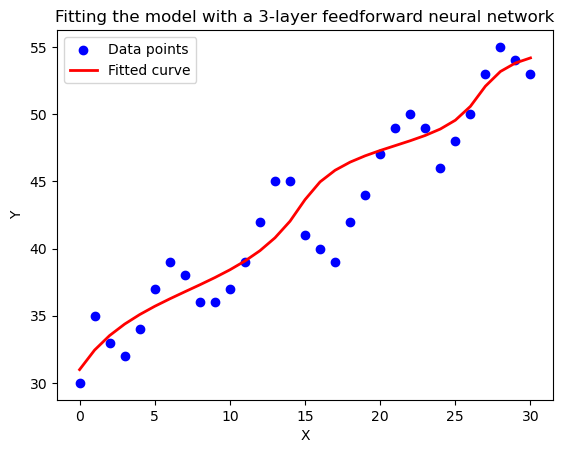

In [16]:
# Calculate the fitted values using the neural network
fitted_Y = model.predict(X)

# Plot the original data points
plt.scatter(X, Y, label='Data points', color='blue')

# Plot the fitted curve
plt.plot(X, fitted_Y, label='Fitted curve', color='red', linewidth=2)

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting the model with a 3-layer feedforward neural network')

# Display the plot
plt.show()

## Comparison: 
The model fit using the three layer feed forward neural network has a slightly smaller MSE than our data from homework 1, and looks much more generalizable, closer to a simple line through the data. The issues our very basic models from homework 1 suffered from was primarily overfitting, but with this method it seems we may suffer from underfitting. 

## Extra: Custom Activation Functions

In [17]:
# Create a sine/cos activation function
sine_activation = tf.keras.layers.Activation(lambda x: tf.math.sin(x) + x)
cos_activation = tf.keras.layers.Activation(lambda x: tf.math.cos(x) + x)

# Create a neural network model with the custom sine activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_dim=1, activation='linear'),
    tf.keras.layers.Dense(10),
    sine_activation,
    tf.keras.layers.Dense(10),
    cos_activation, 
    tf.keras.layers.Dense(1, activation='relu')
])

# Instantiate the Adam optimizer with a custom learning rate
custom_learning_rate = 0.005
optimizer = Adam(learning_rate=custom_learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

1/1 [==============================] - 0s 55ms/step


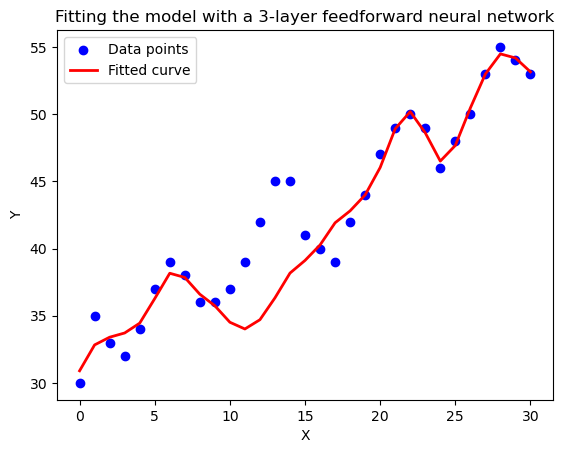

In [18]:
X_train_new = np.concatenate((X[:10], X[-10:]))
Y_train_new = np.concatenate((Y[:10], Y[-10:]))

# Train the model on the new training data
model.fit(X_train_new, Y_train_new, epochs=1000, verbose=0)

# Calculate the fitted values using the neural network
fitted_Y = model.predict(X)

# Plot the original data points
plt.scatter(X, Y, label='Data points', color='blue')

# Plot the fitted curve
plt.plot(X, fitted_Y, label='Fitted curve', color='red', linewidth=2)

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting the model with a 3-layer feedforward neural network')

# Display the plot
plt.show()

In [19]:
mse_train_new = mean_squared_error(Y, fitted_Y)

print(f"Mean squared error for custom activation function: {mse_train_new}")

Mean squared error for custom activation function: 7.464286891601425


## Custom - Multiple Parameters

In [29]:
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomActivation, self).__init__()

    def build(self, input_shape):
        self.A = self.add_weight(name='A', shape=(), initializer='ones', trainable=True)
        self.B = self.add_weight(name='B', shape=(), initializer='ones', trainable=True)
        self.C = self.add_weight(name='C', shape=(), initializer='ones', trainable=True)
        self.D = self.add_weight(name='D', shape=(), initializer='zeros', trainable=True)

    def call(self, inputs):
        return self.A * tf.math.cos(self.B * inputs) + self.C * inputs + self.D

# Example usage:
custom_activation = CustomActivation()


In [66]:
# Define a learning rate schedule
def lr_schedule(epoch=0):
    if epoch < 10:
        lr = 0.1
    elif epoch < 100:
        lr = 0.01
    else:
        lr = 0.005
    return lr

# Create a neural network model with the custom sine activation function
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_dim=1, activation=custom_activation),
    Dropout(0.05),
    tf.keras.layers.Dense(10, activation=custom_activation),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Instantiate the Adam optimizer with a custom learning rate
custom_learning_rate = 0.001
optimizer = Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

1/1 [==============================] - 0s 74ms/step


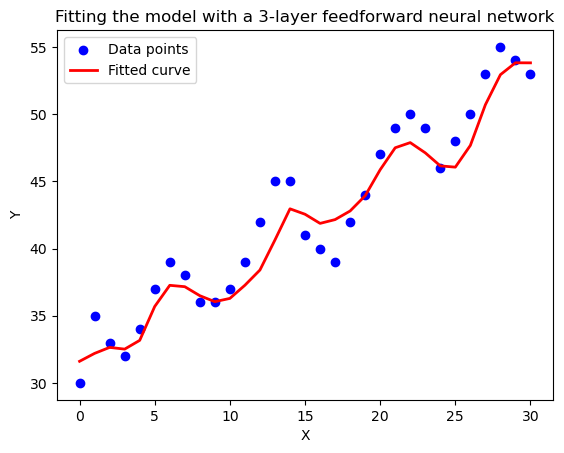

In [67]:
X_train_new = np.concatenate((X[:10], X[-10:]))
Y_train_new = np.concatenate((Y[:10], Y[-10:]))

# Train the model on the new training data
model.fit(X_train_new, Y_train_new, epochs=1000, verbose=0)

# Calculate the fitted values using the neural network
fitted_Y = model.predict(X)

# Plot the original data points
plt.scatter(X, Y, label='Data points', color='blue')

# Plot the fitted curve
plt.plot(X, fitted_Y, label='Fitted curve', color='red', linewidth=2)

# Customize the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Fitting the model with a 3-layer feedforward neural network')

# Display the plot
plt.show()

# II - MNIST

In [49]:
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the images to vectors and normalize the data
X_train = X_train.reshape(-1, 28 * 28).astype("float32") / 255
X_test = X_test.reshape(-1, 28 * 28).astype("float32") / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


## PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## FF Neural Net

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

ffnn = Sequential([
    Dense(128, activation="relu", input_shape=(20,)),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

ffnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
ffnn.fit(X_train_pca, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3259 - accuracy: 0.9029 - val_loss: 0.1675 - val_accuracy: 0.9524
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1482 - accuracy: 0.9550 - val_loss: 0.1308 - val_accuracy: 0.9622
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1181 - accuracy: 0.9628 - val_loss: 0.1232 - val_accuracy: 0.9627
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1006 - accuracy: 0.9686 - val_loss: 0.1076 - val_accuracy: 0.9670
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9720 - val_loss: 0.1094 - val_accuracy: 0.9671
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0799 - accuracy: 0.9742 - val_loss: 0.1042 - val_accuracy: 0.9678
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0732 - accuracy: 0.9765 - val_loss: 0.1035 - val_accuracy:

## LSTM

In [52]:
from tensorflow.keras.layers import LSTM, Reshape

X_train_pca_lstm = X_train_pca.reshape(-1, 4, 5)
X_test_pca_lstm = X_test_pca.reshape(-1, 4, 5)

lstm_model = Sequential([
    LSTM(64, activation="relu", input_shape=(4, 5)),
    Dense(10, activation="softmax")
])

lstm_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
lstm_model.fit(X_train_pca_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5742 - accuracy: 0.8176 - val_loss: 0.2657 - val_accuracy: 0.9172
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2424 - accuracy: 0.9269 - val_loss: 0.2001 - val_accuracy: 0.9396
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1914 - accuracy: 0.9413 - val_loss: 0.1768 - val_accuracy: 0.9474
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1619 - accuracy: 0.9500 - val_loss: 0.1562 - val_accuracy: 0.9519
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1435 - accuracy: 0.9551 - val_loss: 0.1528 - val_accuracy: 0.9535
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1291 - accuracy: 0.9586 - val_loss: 0.1444 - val_accuracy: 0.9571
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1153 - accuracy: 0.9642 - val_loss: 0.1290 - val_accuracy:

## SVM

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel="rbf")
svm.fit(X_train_pca, np.argmax(y_train, axis=1))

y_pred_train_svm = svm.predict(X_train_pca)
y_pred_test_svm = svm.predict(X_test_pca)

accuracy_train_svm = accuracy_score(np.argmax(y_train, axis=1), y_pred_train_svm)
accuracy_test_svm = accuracy_score(np.argmax(y_test, axis=1), y_pred_test_svm)


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_pca, np.argmax(y_train, axis=1))

y_pred_train_dt = dt.predict(X_train_pca)
y_pred_test_dt = dt.predict(X_test_pca)

accuracy_train_dt = accuracy_score(np.argmax(y_train, axis=1), y_pred_train_dt)
accuracy_test_dt = accuracy_score(np.argmax(y_test, axis=1), y_pred_test_dt)


## Evaluation of each model

In [55]:
ffnn_accuracy = ffnn.evaluate(X_test_pca, y_test, verbose=0)[1]
lstm_accuracy = lstm_model.evaluate(X_test_pca_lstm, y_test, verbose=0)[1]

print("Feedforward Neural Network Accuracy: ", ffnn_accuracy)
print("LSTM Accuracy: ", lstm_accuracy)
print("SVM Accuracy: ", accuracy_test_svm)
print("Decision Tree Accuracy: ", accuracy_test_dt)


Feedforward Neural Network Accuracy:  0.9699000120162964
LSTM Accuracy:  0.9623000025749207
SVM Accuracy:  0.9755
Decision Tree Accuracy:  0.8463


In [56]:
import numpy as np
from sklearn.metrics import confusion_matrix

def per_class_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    per_class_acc = cm.diagonal() / cm.sum(axis=1)
    return per_class_acc

# Feedforward Neural Network
ffnn_pred = np.argmax(ffnn.predict(X_test_pca), axis=1)
y_test_labels = np.argmax(y_test, axis=1)
ffnn_per_class_acc = per_class_accuracy(y_test_labels, ffnn_pred)

# LSTM
lstm_pred = np.argmax(lstm_model.predict(X_test_pca_lstm), axis=1)
lstm_per_class_acc = per_class_accuracy(y_test_labels, lstm_pred)

# SVM
svm_pred = svm.predict(X_test_pca)
svm_per_class_acc = per_class_accuracy(y_test_labels, svm_pred)

# Decision Tree
dt_pred = dt.predict(X_test_pca)
dt_per_class_acc = per_class_accuracy(y_test_labels, dt_pred)

313/313 [==============================] - 1s 2ms/step


In [57]:
def print_most_least_accurate_digits(name, per_class_acc):
    most_accurate_digit = np.argmax(per_class_acc)
    least_accurate_digit = np.argmin(per_class_acc)

    print(f"{name}:")
    print(f"Most accurately predicted digit: {most_accurate_digit} - Accuracy: {per_class_acc[most_accurate_digit]*100:.2f}%")
    print(f"Least accurately predicted digit: {least_accurate_digit} - Accuracy: {per_class_acc[least_accurate_digit]*100:.2f}%")
    print()

print_most_least_accurate_digits("Feedforward Neural Network", ffnn_per_class_acc)
print_most_least_accurate_digits("LSTM", lstm_per_class_acc)
print_most_least_accurate_digits("SVM", svm_per_class_acc)
print_most_least_accurate_digits("Decision Tree", dt_per_class_acc)


Feedforward Neural Network:
Most accurately predicted digit: 1 - Accuracy: 99.12%
Least accurately predicted digit: 9 - Accuracy: 94.45%

LSTM:
Most accurately predicted digit: 1 - Accuracy: 99.12%
Least accurately predicted digit: 9 - Accuracy: 92.07%

SVM:
Most accurately predicted digit: 1 - Accuracy: 99.38%
Least accurately predicted digit: 9 - Accuracy: 95.24%

Decision Tree:
Most accurately predicted digit: 1 - Accuracy: 97.00%
Least accurately predicted digit: 8 - Accuracy: 76.28%

